In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from ast import literal_eval

import nltk
nltk.download('punkt')  
nltk.download('stopwords')  
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
data = pd.read_csv(r"C:\Users\Sahil\Desktop\DS\Hotel_Reviews.csv")

In [3]:
data

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [4]:
data.shape

(515738, 17)

In [5]:
data.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [7]:
data.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [8]:
data.Hotel_Address = data.Hotel_Address.str.replace("United Kingdom", "UK")

data["countries"] = data.Hotel_Address.apply(lambda x: x.split(' ')[-1])
print(data.countries.unique())

['Netherlands' 'UK' 'France' 'Spain' 'Italy' 'Austria']


In [9]:
data.drop(columns=[
    'Additional_Number_of_Scoring', 'Review_Date', 'Reviewer_Nationality',
    'Negative_Review', 'Review_Total_Negative_Word_Counts',
    'Total_Number_of_Reviews', 'Positive_Review',
    'Review_Total_Positive_Word_Counts',
    'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
    'days_since_review', 'lat', 'lng'
], inplace=True)


In [10]:
data

,Hotel_Address,Average_Score,Hotel_Name,Tags,countries
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,"[' Leisure trip ', ' Couple ', ' Duplex Double...",Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,"[' Leisure trip ', ' Family with young childre...",Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",Netherlands
...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,"[' Leisure trip ', ' Family with older childre...",Austria
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,"[' Leisure trip ', ' Family with young childre...",Austria
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,"[' Leisure trip ', ' Family with older childre...",Austria
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,8.1,Atlantis Hotel Vienna,"[' Leisure trip ', ' Group ', ' Standard Tripl...",Austria


In [11]:
data.isnull().sum()

Hotel_Address    0
Average_Score    0
Hotel_Name       0
Tags             0
countries        0
dtype: int64

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
def impute(column):
    column = column[0]
    if (type(column) != list):
        return "".join(literal_eval(column))
    else:
        return column
    
data["Tags"] = data[["Tags"]].apply(impute, axis=1)
data.head()

,Hotel_Address,Average_Score,Hotel_Name,Tags,countries
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Leisure trip Couple Duplex Double Room Sta...,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Leisure trip Couple Duplex Double Room Sta...,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Leisure trip Family with young children Dup...,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Leisure trip Solo traveler Duplex Double Ro...,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,Leisure trip Couple Suite Stayed 2 nights ...,Netherlands


In [28]:
data['countries'] = data['countries'].str.lower()
data['Tags'] = data['Tags'].str.lower()

In [32]:
data.head()

,Hotel_Address,Average_Score,Hotel_Name,Tags,countries
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip couple duplex double room sta...,netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip couple duplex double room sta...,netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip family with young children dup...,netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip solo traveler duplex double ro...,netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7.7,Hotel Arena,leisure trip couple suite stayed 2 nights ...,netherlands


In [40]:
def recommend_hotel(location, description):
    description = description.lower()
    word_tokenize(description)
    stop_words = stopwords.words('english')
    lemm = WordNetLemmatizer()
    filtered  = {word for word in description if not word in stop_words}
    filtered_set = set()
    for fs in filtered:
        filtered_set.add(lemm.lemmatize(fs))

    country = data[data['countries']==location.lower()]
    country = country.set_index(np.arange(country.shape[0]))
    list1 = []; list2 = []; cos = [];
    for i in range(country.shape[0]):
        temp_token = word_tokenize(country["Tags"][i])
        temp_set = [word for word in temp_token if not word in stop_words]
        temp2_set = set()
        for s in temp_set:
            temp2_set.add(lemm.lemmatize(s))
        vector = temp2_set.intersection(filtered_set)
        cos.append(len(vector))
    country['similarity']=cos
    country = country.sort_values(by='similarity', ascending=False)
    country.drop_duplicates(subset='Hotel_Name', keep='first', inplace=True)
    country.sort_values('Average_Score', ascending=False, inplace=True)
    country.reset_index(inplace=True)
    return country[["Hotel_Name", "Average_Score", "Hotel_Address"]].head()

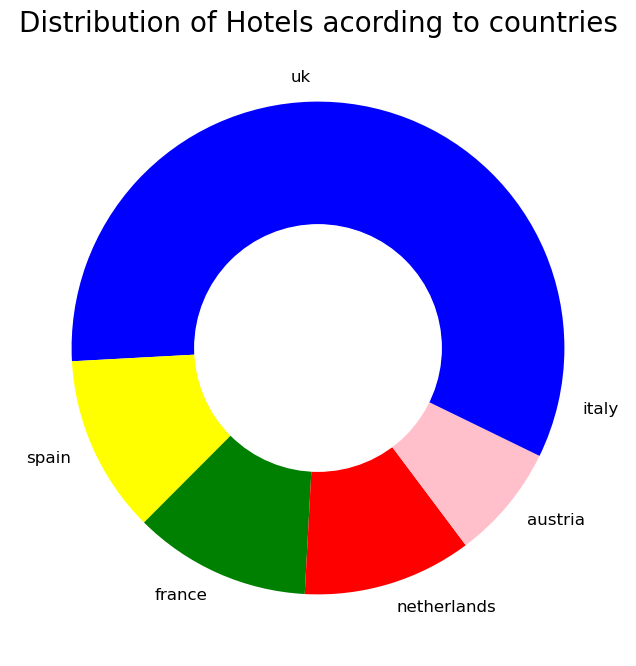

In [93]:
ratings = data["countries"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["blue", "yellow", 'green', "red", "pink"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Hotels acording to countries", fontsize=20)
plt.show()

In [64]:
df1 = recommend_hotel('Italy', 'I am going for a business trip')
df1

,Hotel_Name,Average_Score,Hotel_Address
0,Excelsior Hotel Gallia Luxury Collection Hotel,9.4,Piazza Duca D Aosta 9 Central Station 20124 Mi...
1,Palazzo Parigi Hotel Grand Spa Milano,9.3,Corso Di Porta Nuova 1 Milan City Center 20121...
2,Hotel Spadari Al Duomo,9.3,Via Spadari 11 Milan City Center 20123 Milan I...
3,Room Mate Giulia,9.3,Silvio Pellico 4 Milan City Center 20121 Milan...
4,UNA Maison Milano,9.3,Via Mazzini 4 Milan City Center 20123 Milan Italy


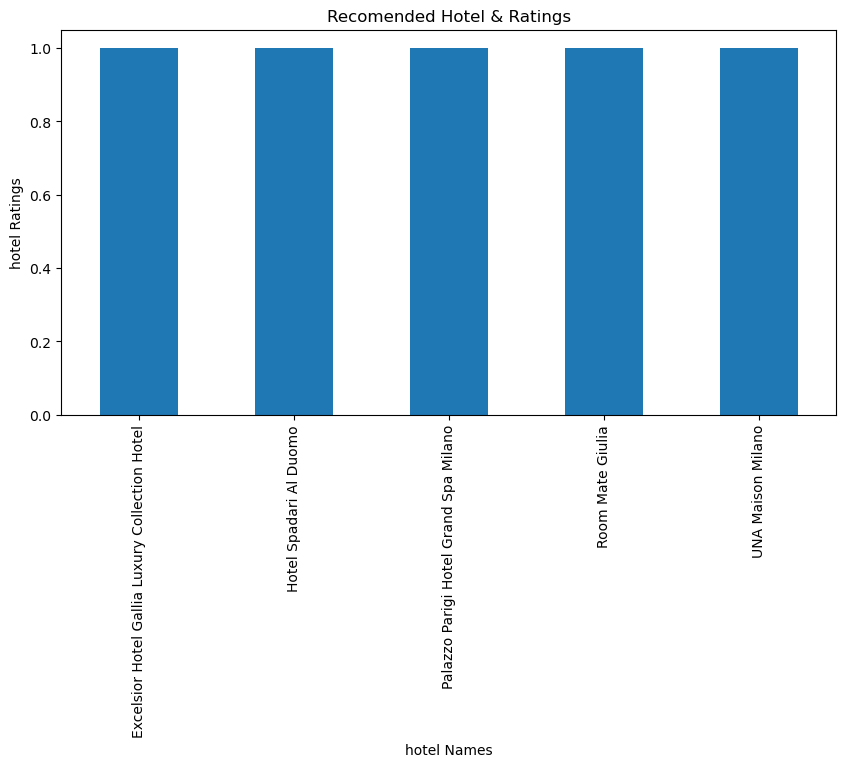

In [66]:
plt.figure(figsize=(10,5))
df1['Hotel_Name'].value_counts().sort_index().plot(kind ='bar')
plt.title("Recomended Hotel & Ratings")
plt.xlabel("hotel Names")
plt.ylabel("hotel Ratings")
plt.show()

In [68]:
df2 =recommend_hotel('UK', 'I am going for a family trip')
df2

,Hotel_Name,Average_Score,Hotel_Address
0,41,9.6,41 Buckingham Palace Road Westminster Borough ...
1,Haymarket Hotel,9.6,1 Suffolk Place Westminster Borough London SW1...
2,Taj 51 Buckingham Gate Suites and Residences,9.5,Buckingham Gate Westminster Borough London SW1...
3,Ham Yard Hotel,9.5,One Ham Yard Westminster Borough London W1D 7D...
4,Milestone Hotel Kensington,9.5,1 Kensington Court Kensington and Chelsea Lond...


In [72]:
df3 = recommend_hotel('France', 'I am going for a business trip')
df3

,Hotel_Name,Average_Score,Hotel_Address
0,Ritz Paris,9.8,15 Place Vend me 1st arr 75001 Paris France
1,H tel de La Tamise Esprit de France,9.6,4 rue d Alger 1st arr 75001 Paris France
2,Le Narcisse Blanc Spa,9.5,19 Boulevard De La Tour Maubourg 7th arr 75007...
3,Hotel The Peninsula Paris,9.5,19 avenue Kleber 16th arr 75116 Paris France
4,La Chambre du Marais,9.4,85 87 RUE DES ARCHIVES 3rd arr 75003 Paris France


In [76]:
df4 = recommend_hotel('Netherlands', 'I am going for a business trip')
df4

,Hotel_Name,Average_Score,Hotel_Address
0,Waldorf Astoria Amsterdam,9.5,Herengracht 542 556 Amsterdam City Center 1017...
1,The Toren,9.4,Keizersgracht 164 Amsterdam City Center 1015 C...
2,Pillows Anna van den Vondel Amsterdam,9.4,Anna van den Vondelstraat 6 Oud West 1054 GZ A...
3,Canal House,9.3,Keizersgracht 148 Amsterdam City Center 1015 C...
4,Luxury Suites Amsterdam,9.3,Oudeschans 75 Amsterdam City Center 1011 KW Am...


In [78]:
df4 = recommend_hotel('Spain', 'I am going for a business trip')
df4

,Hotel_Name,Average_Score,Hotel_Address
0,Hotel Casa Camper,9.6,Elisabets 11 Ciutat Vella 08001 Barcelona Spain
1,Hotel The Serras,9.6,Passeig de Colom 9 Ciutat Vella 08002 Barcelon...
2,H10 Casa Mimosa 4 Sup,9.6,Pau Claris 179 Eixample 08037 Barcelona Spain
3,Mercer Hotel Barcelona,9.5,Dels Lledo 7 Ciutat Vella 08003 Barcelona Spain
4,Catalonia Square 4 Sup,9.4,Ronda Sant Pere 9 Eixample 08010 Barcelona Spain


In [80]:
df5 = recommend_hotel('Austria', 'I am going for a business trip')
df5

,Hotel_Name,Average_Score,Hotel_Address
0,Hotel Sacher Wien,9.5,Philharmoniker Stra e 4 01 Innere Stadt 1010 V...
1,Palais Coburg Residenz,9.5,Coburgbastei 4 01 Innere Stadt 1010 Vienna Aus...
2,Best Western Premier Kaiserhof Wien,9.4,Frankenberggasse 10 04 Wieden 1040 Vienna Austria
3,The Guesthouse Vienna,9.4,F hrichgasse 10 01 Innere Stadt 1010 Vienna Au...
4,Hotel Sans Souci Wien,9.4,Burggasse 2 07 Neubau 1070 Vienna Austria
